In [449]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
import matplotlib.dates as mdates
from datetime import datetime
from dateutil.relativedelta import relativedelta
plt.style.use("ggplot")

In [305]:
DATA_PATH = '../data/'
tickets = pd.read_csv(DATA_PATH + 'tickets_processed.csv')
cycles = pd.read_csv(DATA_PATH + 'analytics_processed.csv')

In [306]:
tickets['datetime'] = pd.to_datetime(tickets['datetime'], format = "%Y-%m-%d %H:%M:%S")
cycles['first_timestamp'] = pd.to_datetime(cycles['first_timestamp'], format = "%Y-%m-%d %H:%M:%S")
cycles['last_timestamp'] = pd.to_datetime(cycles['last_timestamp'], format = "%Y-%m-%d %H:%M:%S")

### Preview of Tickets and Cycles dataframes

In [307]:
tickets.head()

,ticket_id,client,store,datetime
0,1,161600,8136,2015-05-25 11:13:52
1,2,82155,8136,2015-05-25 11:52:42
2,3,202968,8136,2015-05-25 12:30:50
3,4,609861,8136,2015-05-25 13:35:32
4,5,84568,8136,2015-05-25 17:32:34


In [308]:
print(f'Number of tickets: {len(tickets):,d}')

Number of tickets: 557,817


In [309]:
cycles.head()

,local,hash,first_timestamp,last_timestamp
0,7633,484858492120526,2020-02-13 18:05:10,2020-02-13 18:15:02
1,7633,462419088891167,2020-02-13 09:35:16,2020-02-13 09:40:32
2,7633,370013777344297,2020-02-13 11:00:39,2020-02-13 11:02:57
3,7633,409386925116844,2020-02-13 17:00:23,2020-02-13 18:21:36
4,7633,479623648581674,2020-02-13 12:50:34,2020-02-13 12:54:02


In [310]:
print(f'Number of cycles: {len(cycles):,d}')

Number of cycles: 1,048,265


### Unique values of each column

In [311]:
def count_uniques(df):
    result = {}
    for i in range(df.shape[1]):
        col = df.columns[i]
        result[col] = df[col].nunique()
    return pd.DataFrame(result, index = ['n_unique'])

In [312]:
count_uniques(tickets)

,ticket_id,client,store,datetime
n_unique,557817,162914,17,547576


In [313]:
count_uniques(cycles)

,local,hash,first_timestamp,last_timestamp
n_unique,20,540970,1025463,1026005


### Dates ranges

In [314]:
def dates_range(df, column = 'datetime'):
    datepoints = pd.Series(df[column].copy().unique())
    datepoints = datepoints.sort_values().reset_index(drop=True)
    start_date = datepoints[0]
    end_date = datepoints[len(datepoints)-1]
    print('     oldest date: ', start_date)
    print('most recent date: ', end_date)
    difference_in_years = relativedelta(end_date, start_date)
    print(difference_in_years)

In [315]:
dates_range(tickets)

     oldest date:  2014-01-04 10:04:20
most recent date:  2018-07-19 21:15:40
relativedelta(years=+4, months=+6, days=+15, hours=+11, minutes=+11, seconds=+20)


In [316]:
dates_range(cycles, 'first_timestamp')

     oldest date:  2015-12-31 00:00:07
most recent date:  2020-02-13 19:43:42
relativedelta(years=+4, months=+1, days=+13, hours=+19, minutes=+43, seconds=+35)


In [317]:
dates_range(cycles, 'last_timestamp')

     oldest date:  2015-12-31 00:08:30
most recent date:  2020-02-13 19:45:43
relativedelta(years=+4, months=+1, days=+13, hours=+19, minutes=+37, seconds=+13)


### Plots

#### Stores plot

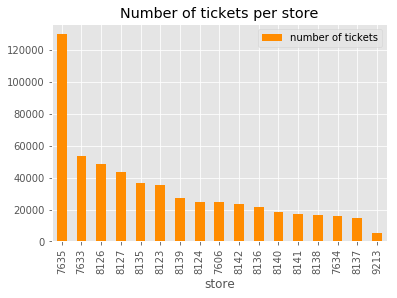

In [318]:
stores_tickets = tickets.groupby('store').count()
stores_tickets = stores_tickets[['ticket_id']].reset_index()
stores_tickets = stores_tickets.rename({'ticket_id': 'number of tickets'}, axis=1)
stores_tickets = stores_tickets.sort_values('number of tickets', ascending=False)
stores_tickets.plot.bar('store','number of tickets', title='Number of tickets per store', color='darkorange', figsize=(6,4))
plt.show()

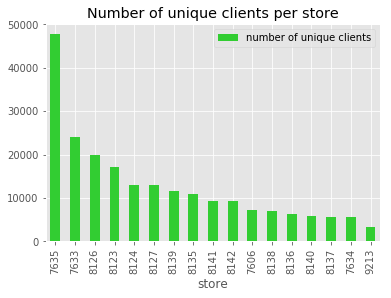

In [319]:
stores_clients = tickets.groupby('store').client.nunique()
stores_clients = stores_clients.reset_index()
stores_clients = stores_clients.rename({'client': 'number of unique clients'}, axis=1)
stores_clients = stores_clients.sort_values('number of unique clients', ascending=False)
stores_clients.plot.bar('store','number of unique clients', title='Number of unique clients per store', color='limegreen', figsize=(6,4))
plt.show()

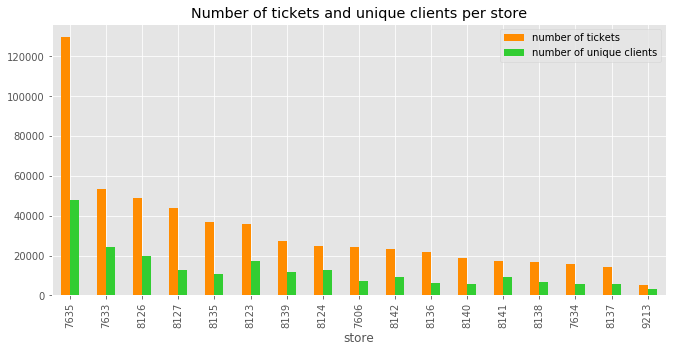

In [320]:
stores_tickets_clients = pd.merge(stores_tickets, stores_clients, how='outer', left_on=['store'], right_on=['store'])
stores_tickets_clients.plot.bar('store', color=['darkorange','limegreen'], figsize=(11,5), title='Number of tickets and unique clients per store')
plt.show()

#### Locals plot

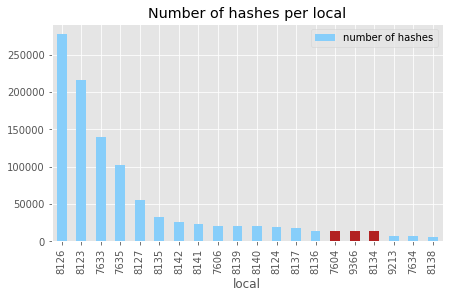

In [438]:
locals_hashes = cycles.groupby('local').count()
locals_hashes = locals_hashes[['hash']].reset_index()
locals_hashes = locals_hashes.rename({'hash': 'number of hashes'}, axis=1)
locals_hashes = locals_hashes.sort_values('number of hashes', ascending=False)
locals_hashes.plot.bar('local','number of hashes', title='Number of hashes per local',
                       color=['lightskyblue' if x in stores_tickets['store'].unique() else 'firebrick' for x in locals_hashes['local']],
                       figsize=(7,4))
plt.show()

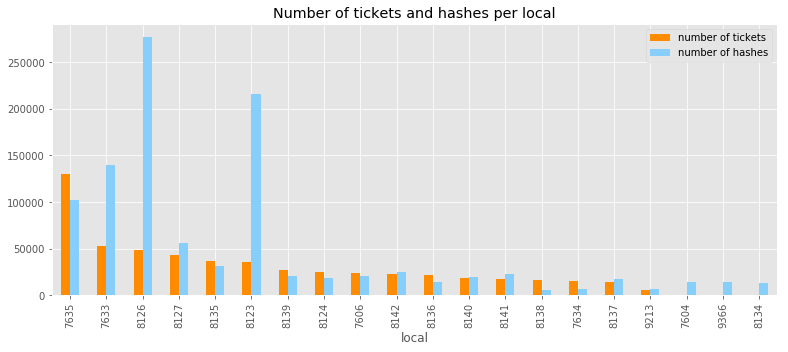

In [443]:
locals_tickets_hashes = pd.merge(stores_tickets, locals_hashes, how='right', left_on=['store'], right_on=['local'])
locals_tickets_hashes = locals_tickets_hashes.drop(['store'], axis=1)
locals_tickets_hashes.plot.bar('local', color=['darkorange','lightskyblue'], figsize=(13,5), title='Number of tickets and hashes per local')
plt.show()

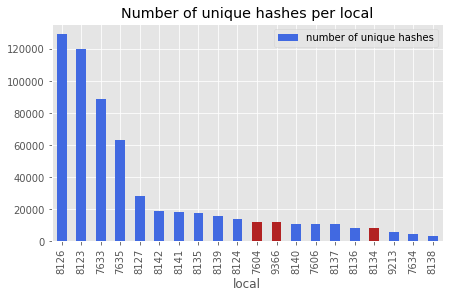

In [444]:
locals_uniqueHashes = cycles.groupby('local').hash.nunique()
locals_uniqueHashes = locals_uniqueHashes.reset_index()
locals_uniqueHashes = locals_uniqueHashes.rename({'hash': 'number of unique hashes'}, axis=1)
locals_uniqueHashes = locals_uniqueHashes.sort_values('number of unique hashes', ascending=False)
locals_uniqueHashes.plot.bar('local','number of unique hashes', title='Number of unique hashes per local',
                             color=['royalblue' if x in stores_tickets['store'].unique() else 'firebrick' for x in locals_uniqueHashes['local']],
                             figsize=(7,4))
plt.show()

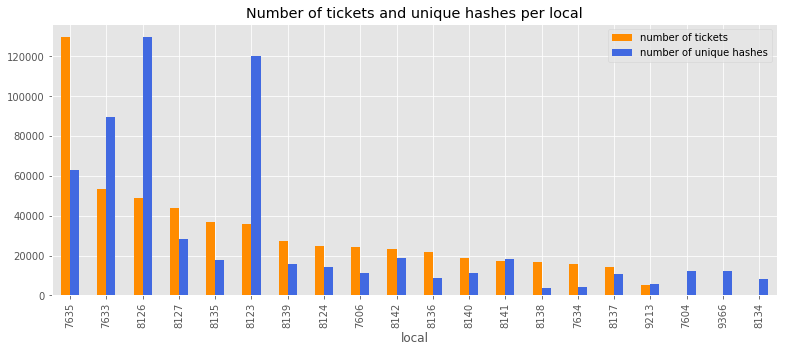

In [445]:
locals_tickets_uniqueHashes = pd.merge(stores_tickets, locals_uniqueHashes, how='right', left_on=['store'], right_on=['local'])
locals_tickets_uniqueHashes = locals_tickets_uniqueHashes.drop(['store'], axis=1)
locals_tickets_uniqueHashes.plot.bar('local', color=['darkorange','royalblue'], figsize=(13,5), title='Number of tickets and unique hashes per local')
plt.show()

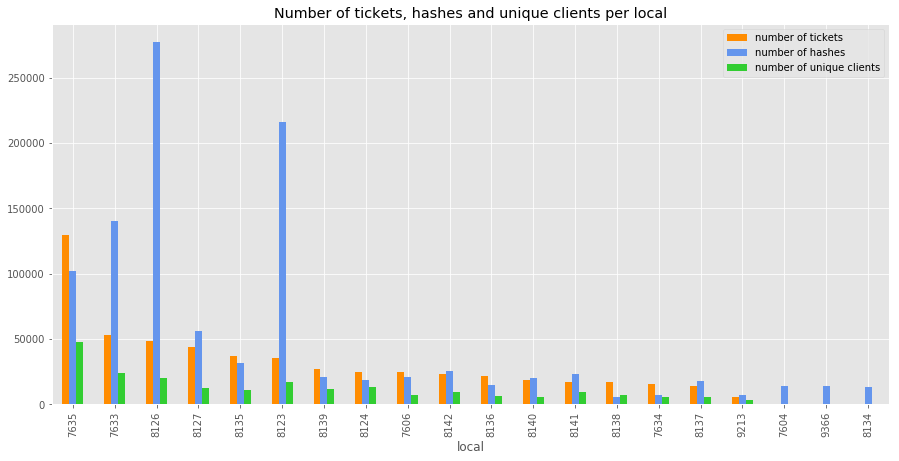

In [354]:
locals_tickets_hashes_clients = pd.merge(locals_tickets_hashes, stores_clients, how='left', left_on=['local'], right_on=['store'])
locals_tickets_hashes_clients = locals_tickets_hashes_clients.drop(['store'], axis=1)
locals_tickets_hashes_clients.plot.bar('local', color=['darkorange','cornflowerblue','limegreen'], figsize=(15,7), title='Number of tickets, hashes and unique clients per local')
plt.show()

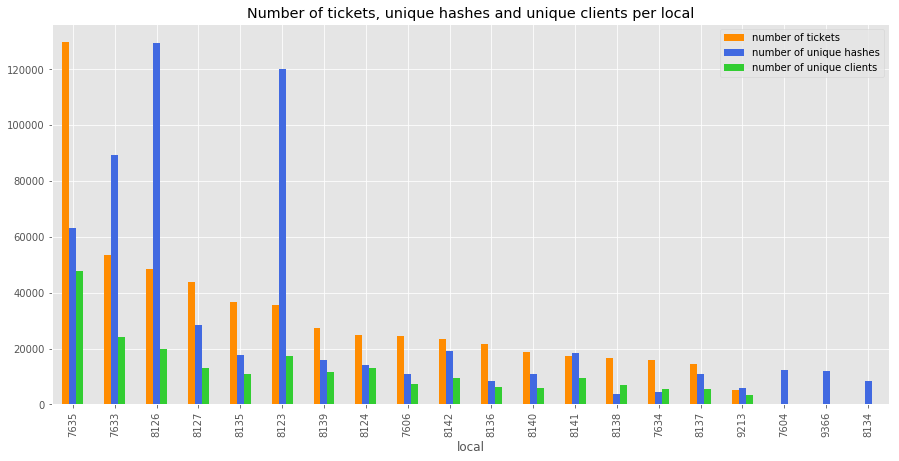

In [446]:
locals_tickets_uniqueHashes_clients = pd.merge(locals_tickets_uniqueHashes, stores_clients, how='left', left_on=['local'], right_on=['store'])
locals_tickets_uniqueHashes_clients = locals_tickets_uniqueHashes_clients.drop(['store'], axis=1)
locals_tickets_uniqueHashes_clients.plot.bar('local', color=['darkorange','royalblue','limegreen'], figsize=(15,7), title='Number of tickets, unique hashes and unique clients per local')
plt.show()

### Tickets timestamps

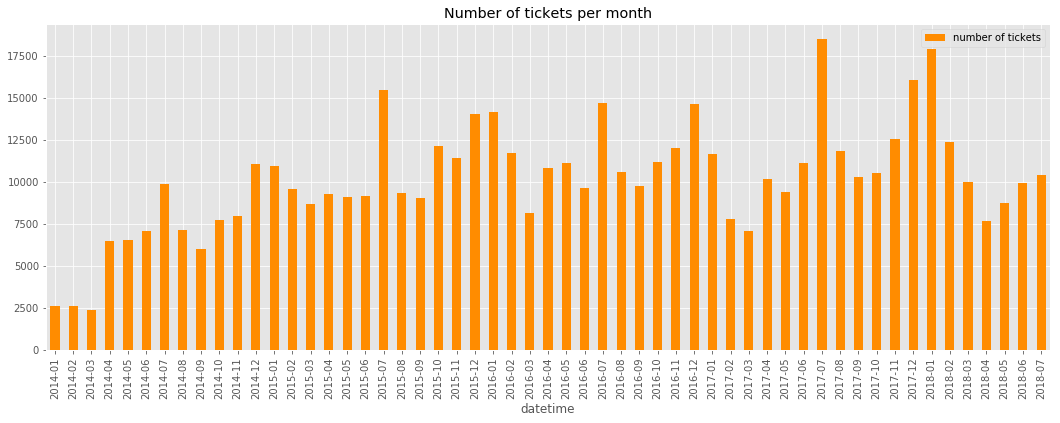

In [384]:
monthly_tickets = tickets.copy()
monthly_tickets['datetime'] = pd.DatetimeIndex(monthly_tickets['datetime']).strftime('%Y-%m')
datetime_tickets = monthly_tickets.copy().groupby('datetime').count()
datetime_tickets = datetime_tickets.drop(['client','store'], axis=1).reset_index()
datetime_tickets = datetime_tickets.rename({'ticket_id': 'number of tickets'}, axis=1)
datetime_tickets['datetime'] = datetime_tickets['datetime'].astype('O')
datetime_tickets.plot.bar('datetime','number of tickets', color='darkorange', figsize=(18,6), title='Number of tickets per month')
plt.show()

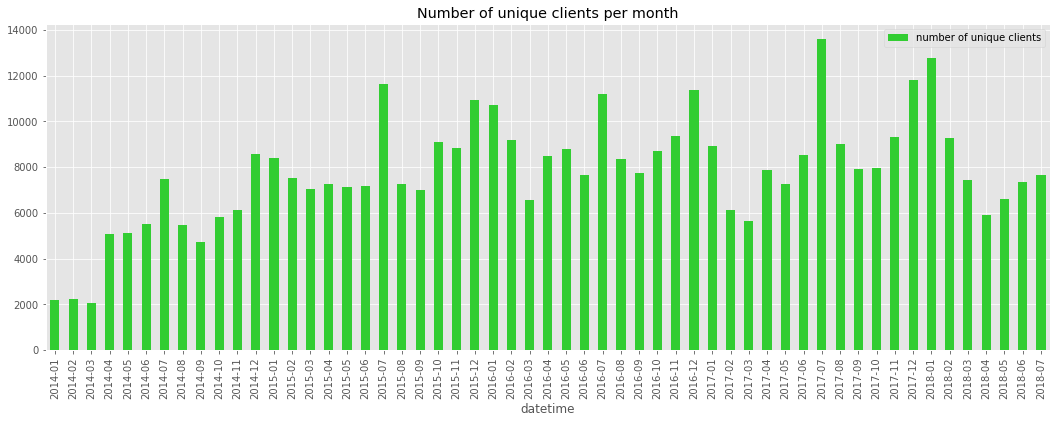

In [385]:
datetime_clients = monthly_tickets.copy().groupby('datetime').client.nunique()
datetime_clients = datetime_clients.reset_index()
datetime_clients = datetime_clients.rename({'client': 'number of unique clients'}, axis=1)
datetime_clients['datetime'] = datetime_clients['datetime'].astype('O')
datetime_clients.plot.bar('datetime','number of unique clients', color='limegreen', figsize=(18,6), title='Number of unique clients per month')
plt.show()

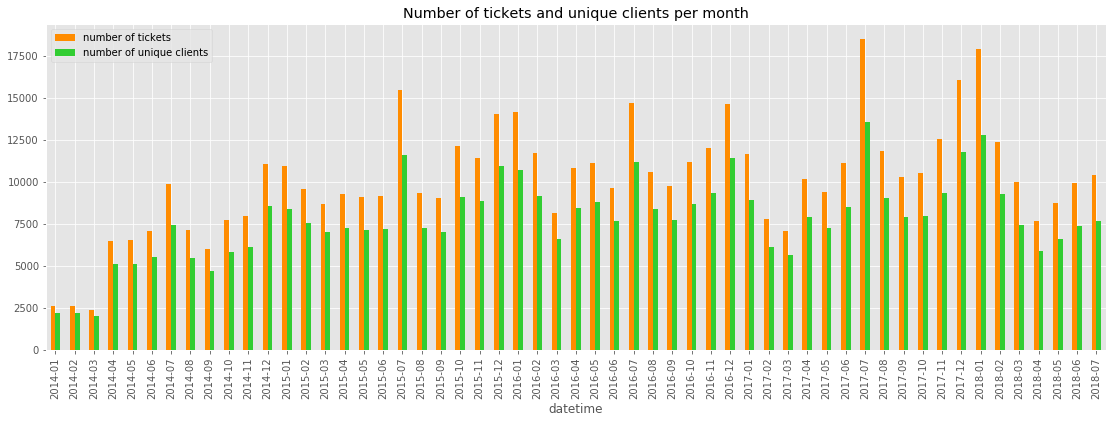

In [404]:
datetime_tickets_clients = pd.merge(datetime_tickets, datetime_clients, how='outer', left_on=['datetime'], right_on=['datetime'])
datetime_tickets_clients.plot.bar('datetime', color=['darkorange','limegreen'], figsize=(19,6), title='Number of tickets and unique clients per month')
plt.show()

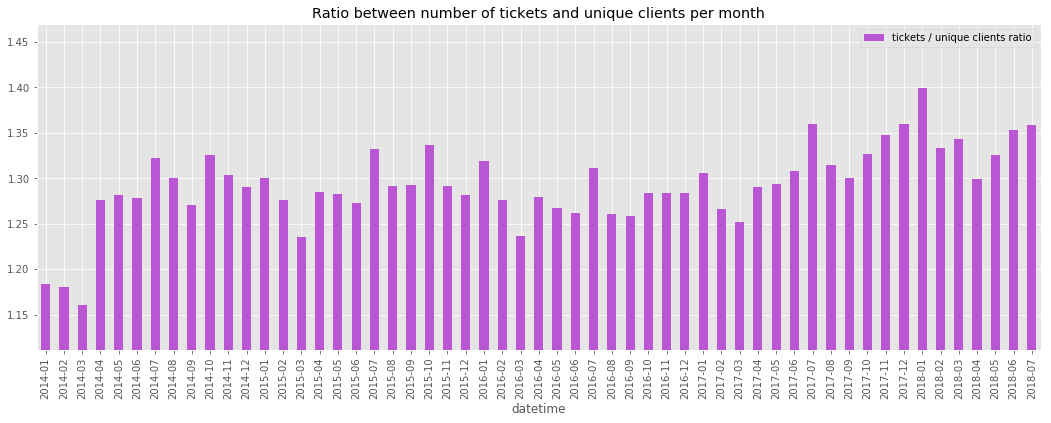

In [420]:
datetime_tickets_clients.plot.bar('datetime','tickets / unique clients ratio', color='mediumorchid', figsize=(18,6),
                                  title='Ratio between number of tickets and unique clients per month')
plt.ylim(bottom=min(datetime_tickets_clients['tickets / unique clients ratio'])-0.05)
plt.show()

### Cycles timestamps

In [421]:
monthly_cycles = cycles.copy()
monthly_cycles['first_timestamp'] = pd.DatetimeIndex(monthly_cycles['first_timestamp']).strftime('%Y-%m')
datetime_hashes = monthly_cycles.copy().groupby('first_timestamp').count()

,local,hash,first_timestamp,last_timestamp
0,7633,484858492120526,2020-02,2020-02-13 18:15:02
1,7633,462419088891167,2020-02,2020-02-13 09:40:32
2,7633,370013777344297,2020-02,2020-02-13 11:02:57
3,7633,409386925116844,2020-02,2020-02-13 18:21:36
4,7633,479623648581674,2020-02,2020-02-13 12:54:02
...,...,...,...,...
1048260,9213,395857395853022,2018-07,2018-07-19 14:22:58
1048261,9213,330309348107354,2018-07,2018-07-19 14:58:54
1048262,9213,395857390803576,2018-07,2018-07-19 13:07:23
1048263,9213,348278303468891,2018-07,2018-07-19 13:56:49


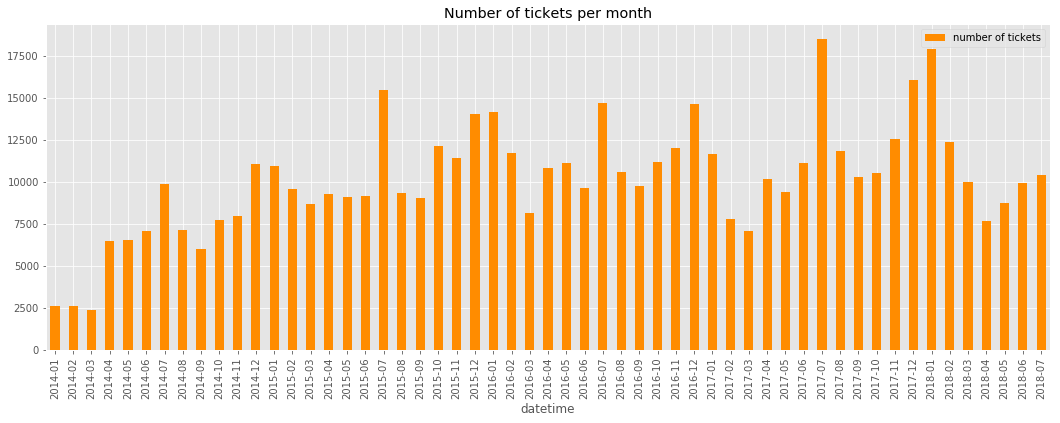

In [384]:
monthly_tickets = tickets.copy()
monthly_tickets['datetime'] = pd.DatetimeIndex(monthly_tickets['datetime']).strftime('%Y-%m')
datetime_tickets = monthly_tickets.copy().groupby('datetime').count()
datetime_tickets = datetime_tickets.drop(['client','store'], axis=1).reset_index()
datetime_tickets = datetime_tickets.rename({'ticket_id': 'number of tickets'}, axis=1)
datetime_tickets['datetime'] = datetime_tickets['datetime'].astype('O')
datetime_tickets.plot.bar('datetime','number of tickets', color='darkorange', figsize=(18,6), title='Number of tickets per month')
plt.show()

In [ ]:
datetime_tickets_clients